In [25]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import lightkurve as lk


def show_periodogram_and_lc(time, flux, minimum_period=1, maximum_period=100, bin_dt=5):
    poly = np.polyfit(time,flux, deg=2)
    y_red = np.polyval(poly, time)
    flux_normalized = flux/y_red

    lc = lk.LightCurve(data=None, time=time, flux= flux_normalized, flux_err=None)
    pg = lc.to_periodogram(minimum_period=minimum_period, maximum_period=maximum_period)
    period = pg.period_at_max_power
    pg.plot(view='period') ;
    plt.xscale("log")
    plt.show()
    lc_bin = lc.bin(bin_dt)
    fig=plt.figure(figsize = (14, 7))
    plt.plot(lc.time.value, lc.flux.value, label = "1s")
    plt.plot(lc_bin.time.value, lc_bin.flux.value,label ="%ds" % bin_dt)
    plt.xlabel("Time [s]", fontsize  = 23)
    plt.ylabel("flux", fontsize  = 23)
    plt.legend(fontsize = 15)
    plt.show()
    
bin_t = 10
r_ap = 20 ## choose from 10, 15, 20, 25
obs_date = "20220111" ## 20221014, 20221015, 20220111, 20220112, 20220113, 20220114, 20220524, 
band = "g_band" ## g_band, r_band, z_band
out_dir = "/alps/south/reduced/%s_analyzed/movies/*/%s" % (obs_date, band)
names = glob.glob(out_dir + "*")

/alps/south/reduced/20220111_analyzed/movies/WD_triccs26/g_band


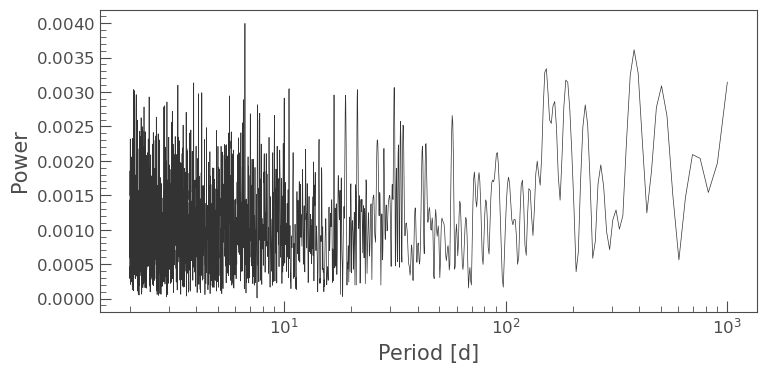

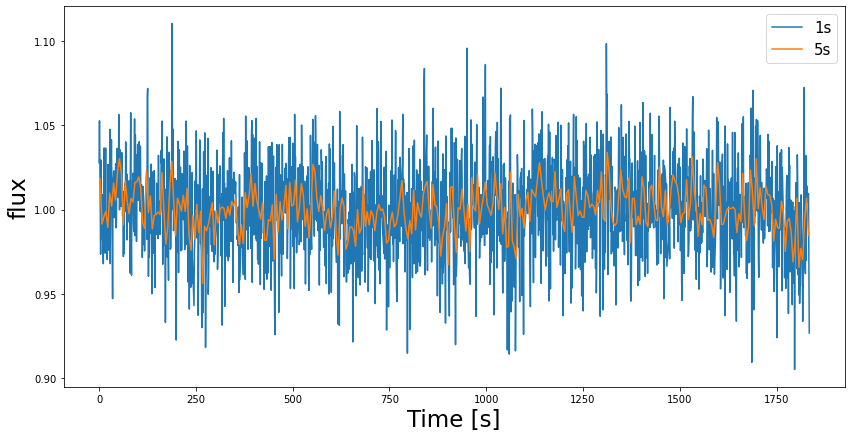

/alps/south/reduced/20220111_analyzed/movies/WD_triccs12/g_band


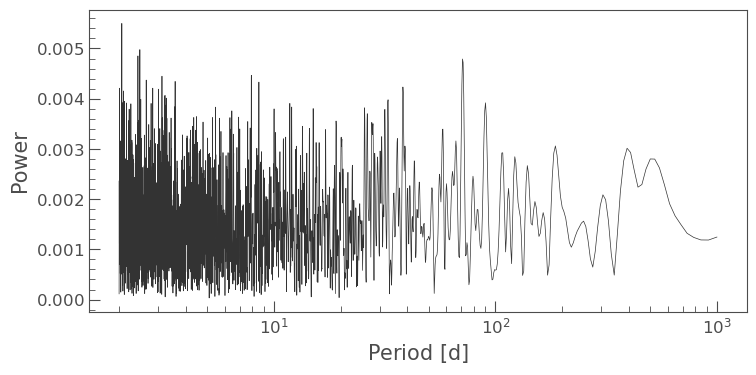

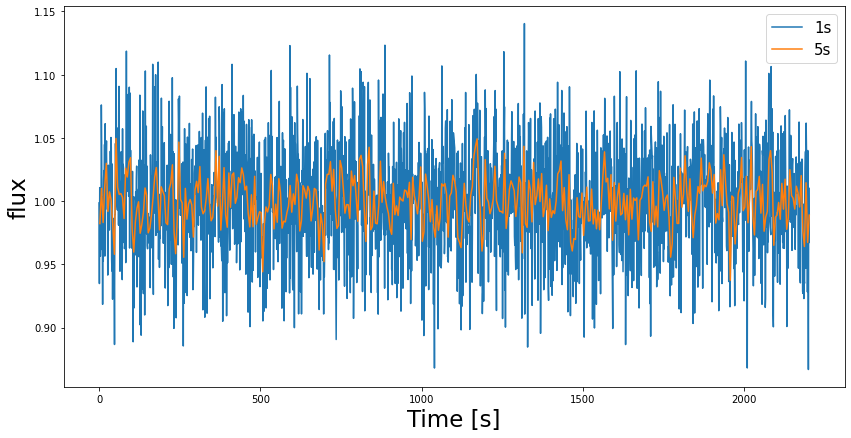

/alps/south/reduced/20220111_analyzed/movies/WD_new21/g_band


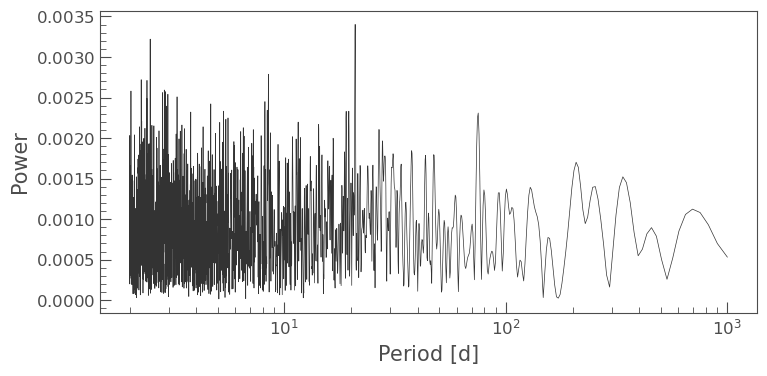

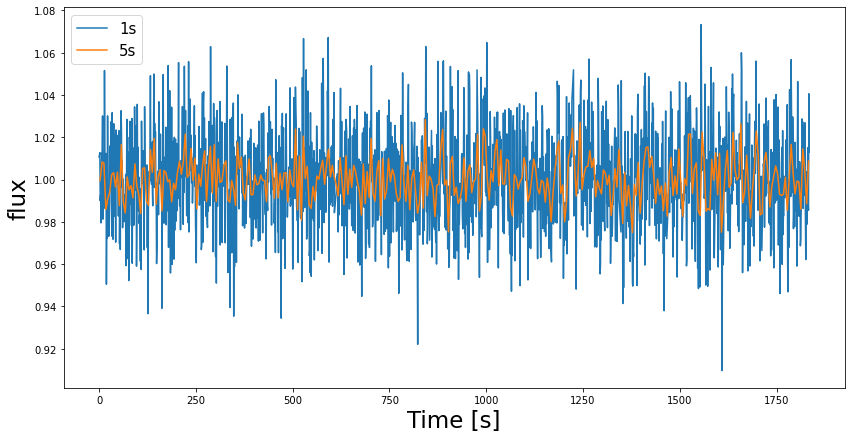

/alps/south/reduced/20220111_analyzed/movies/WD_new25/g_band


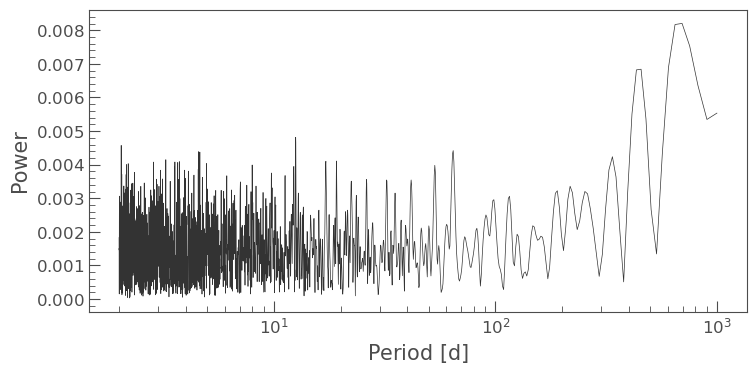

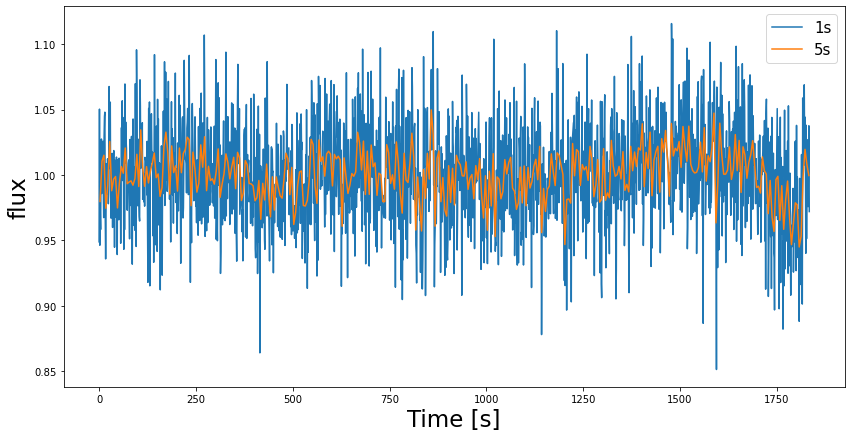

/alps/south/reduced/20220111_analyzed/movies/WD_new15/g_band


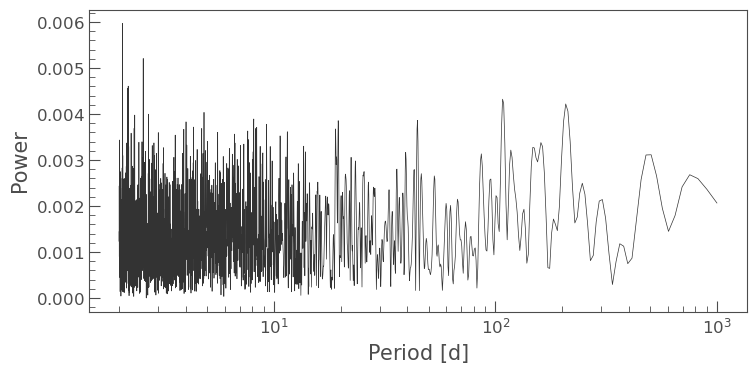

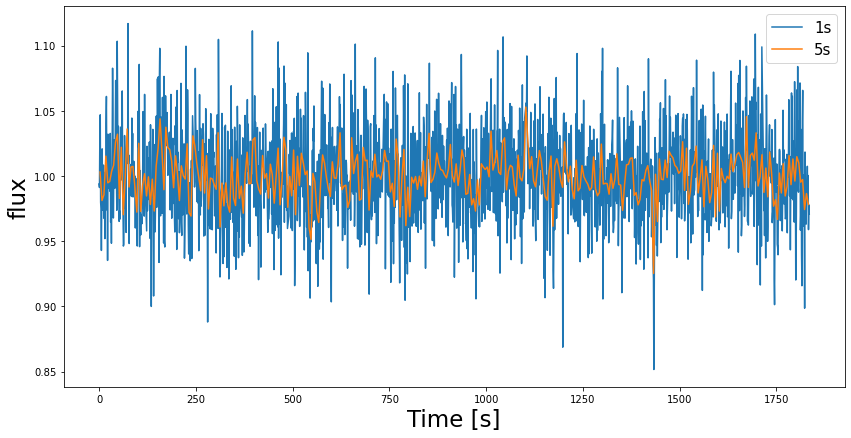

/alps/south/reduced/20220111_analyzed/movies/WD_new24/g_band


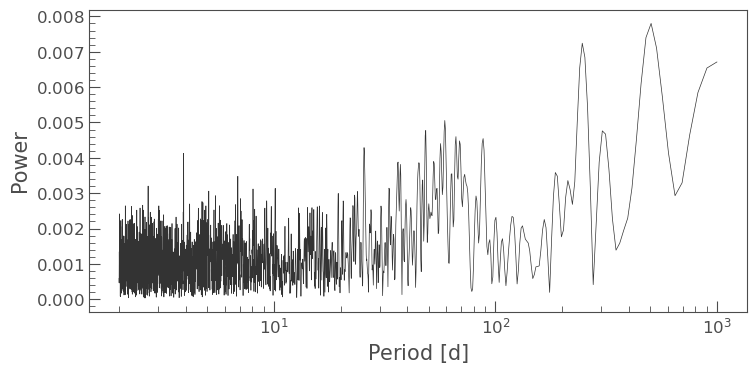

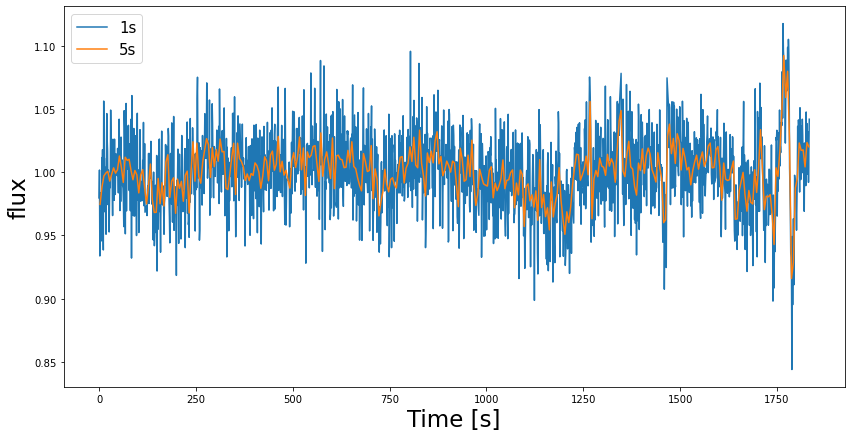

/alps/south/reduced/20220111_analyzed/movies/WD_triccs29/g_band


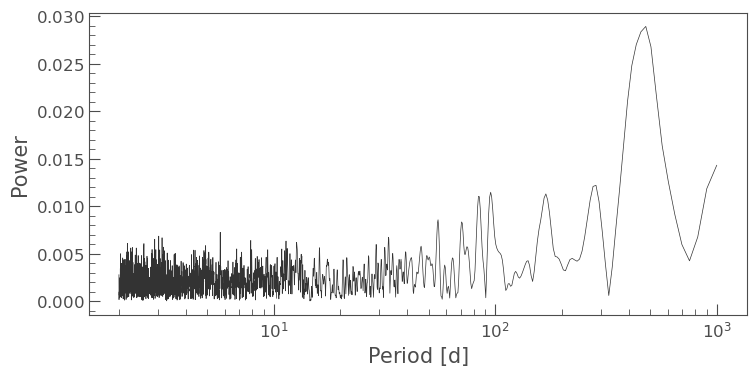

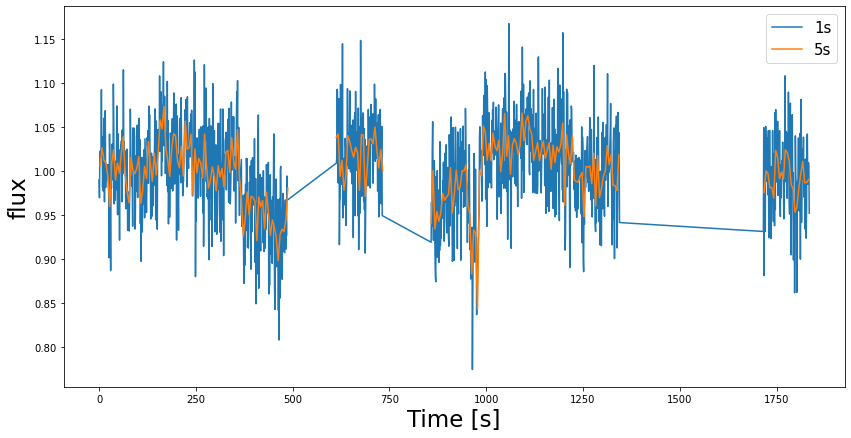

/alps/south/reduced/20220111_analyzed/movies/WD_triccs28/g_band


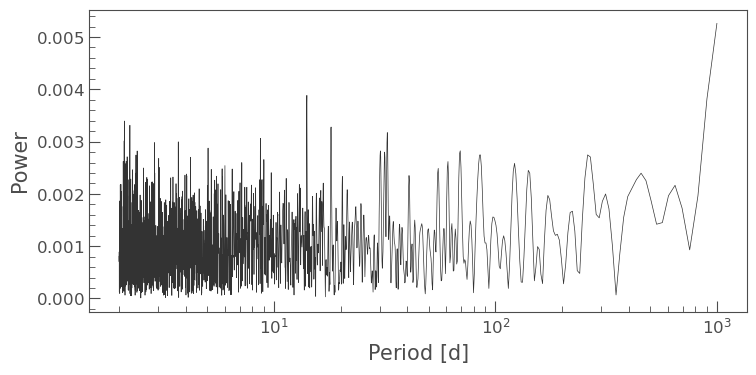

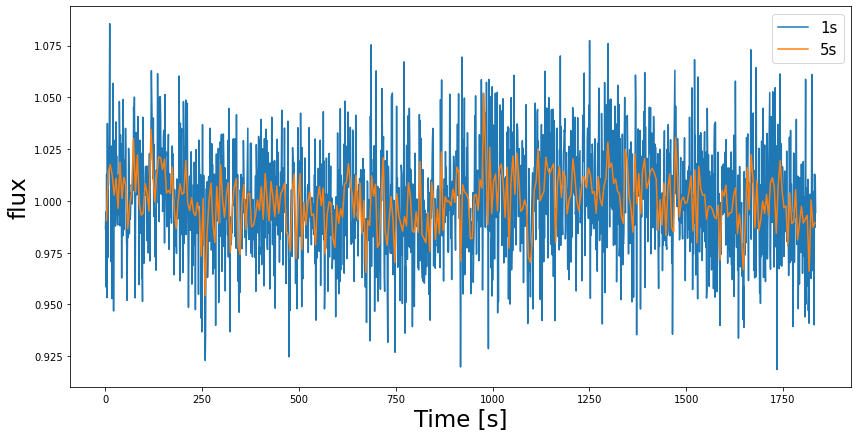

/alps/south/reduced/20220111_analyzed/movies/WD_new22/g_band


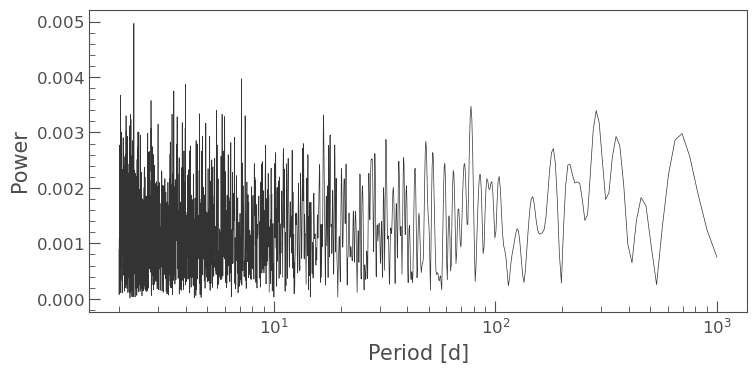

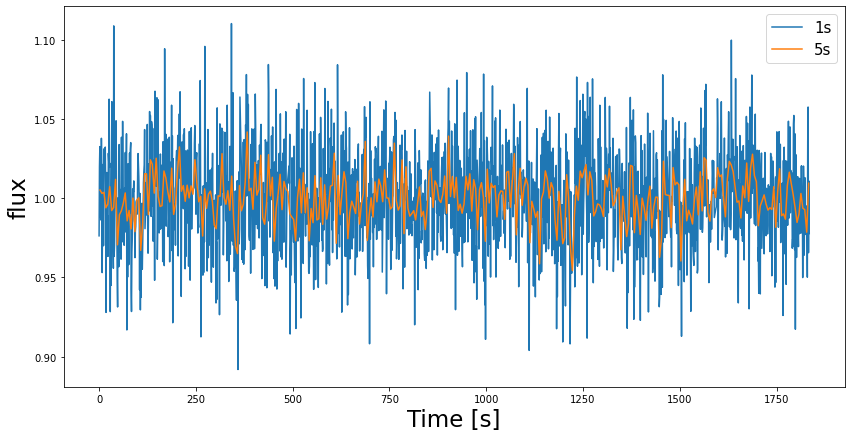

/alps/south/reduced/20220111_analyzed/movies/WD_new16/g_band


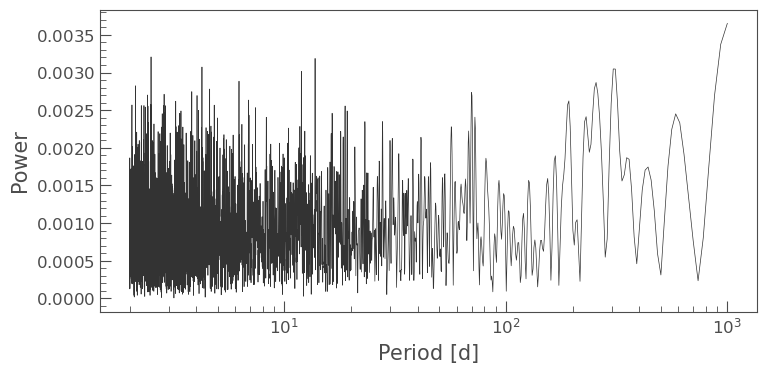

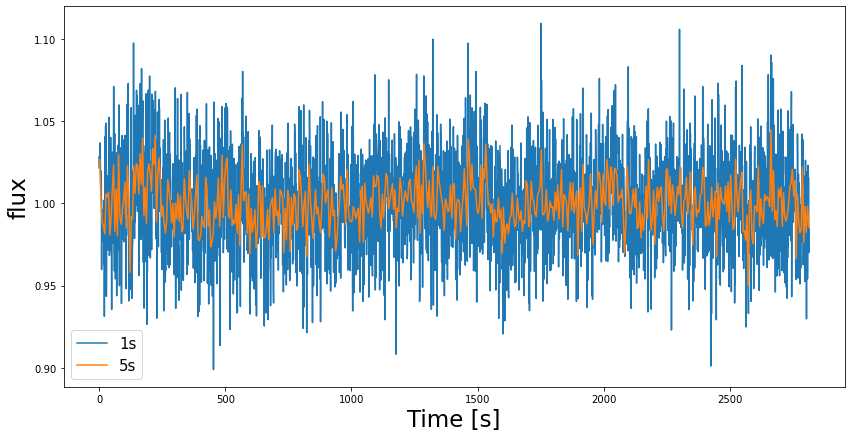

/alps/south/reduced/20220111_analyzed/movies/WD_triccs18/g_band


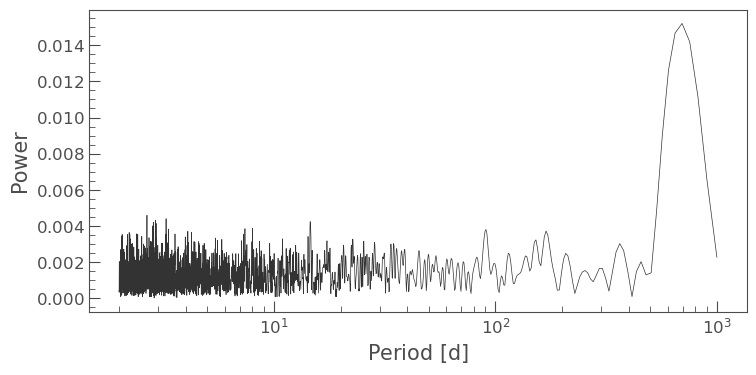

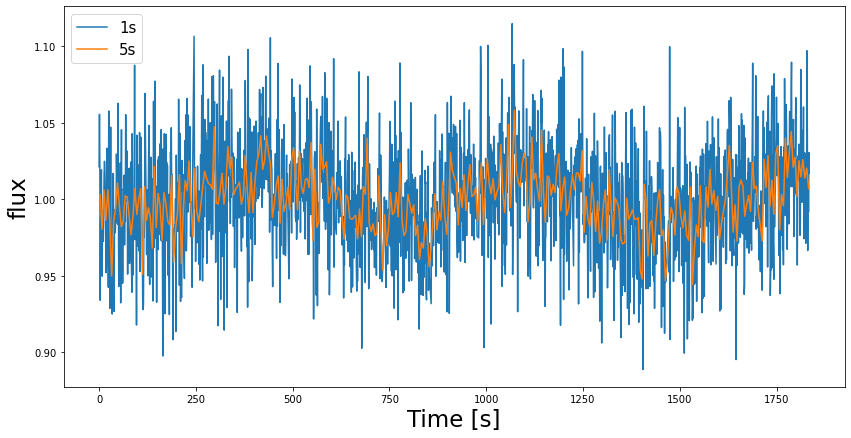

/alps/south/reduced/20220111_analyzed/movies/WD_new13/g_band


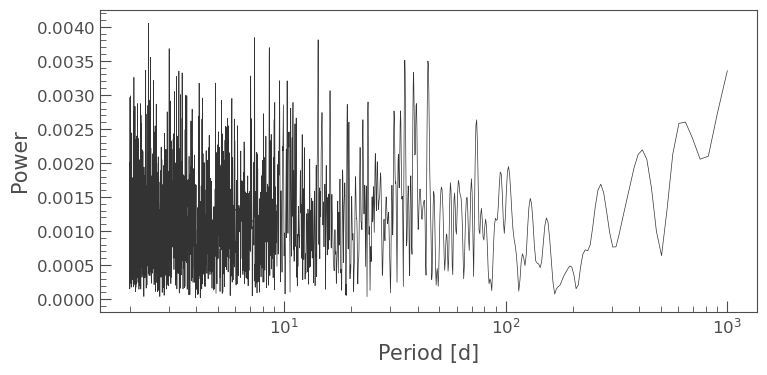

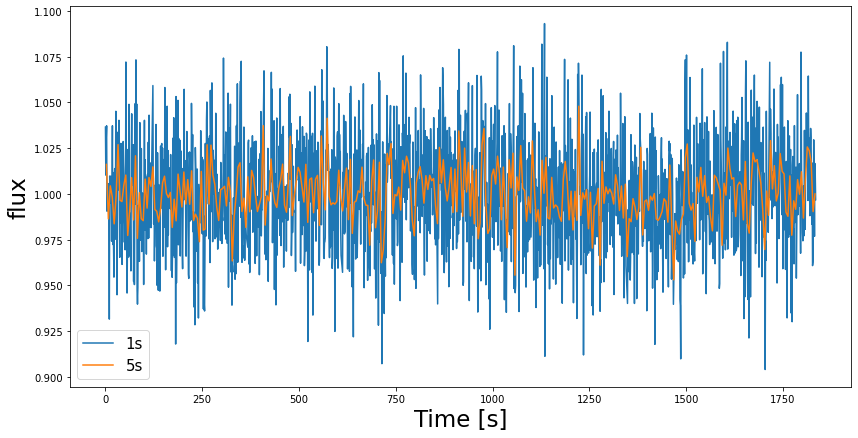

In [26]:
for name in names:
    files = glob.glob(name + "/target_processed_*_lc%d.npz" % r_ap)
    
    files = sorted(files)
    print(name)
    for file in files:
        data_g = np.load(file)
        time_target = data_g["time"]
        flux_target_pca = data_g["lc_pca"]
        flux_least = data_g["lc_least_var"]
        show_periodogram_and_lc(time_target - np.min(time_target), flux_target_pca, maximum_period=1000, minimum_period=2)  